In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
#The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [116]:
data=pd.read_csv('bank-additional-full.csv',delimiter=';')

In [117]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [119]:
data.shape

(41188, 21)

In [120]:
data.duplicated().sum()

12

# Checking for outliers

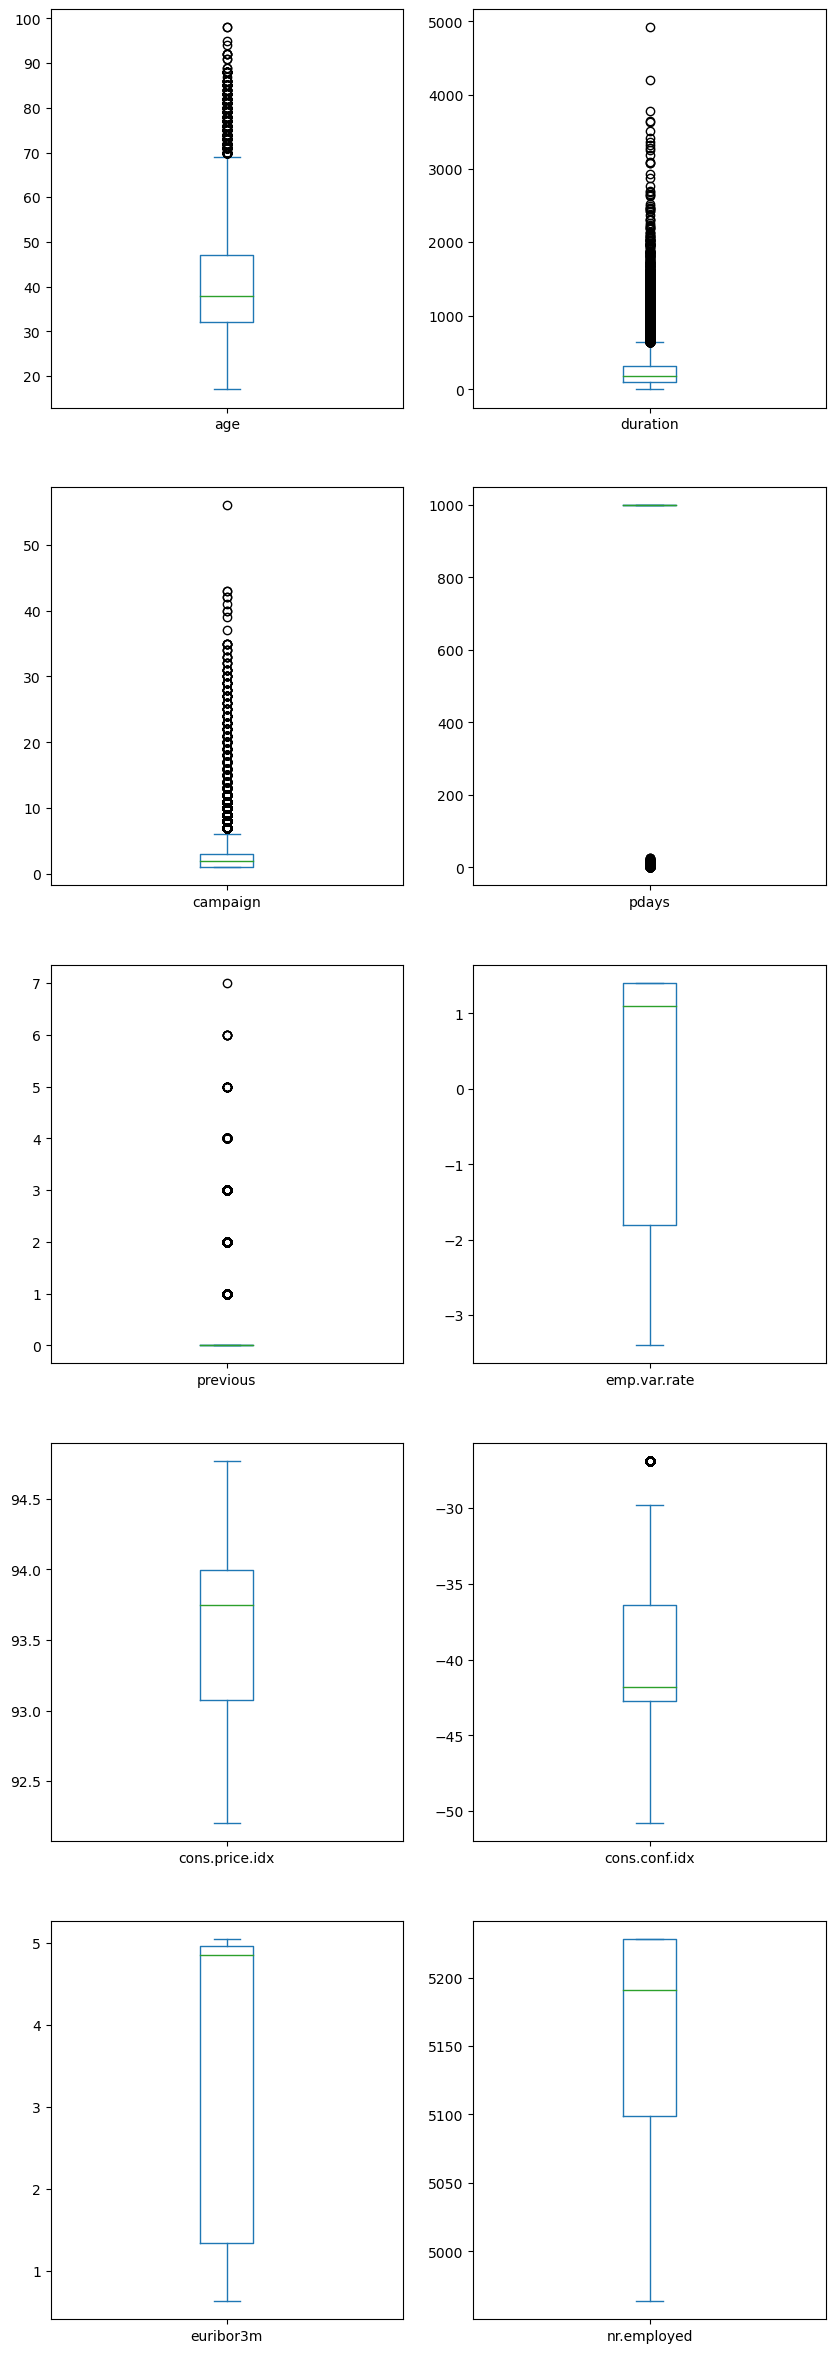

In [121]:
data.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

# Outlier treatment

In [122]:
columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the DataFrame for the current column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [123]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,35561.000000,35561.000000,35561.000000,35561.000000,35561.000000,35561.000000,35561.000000,35561.000000,35561.000000,35561.000000
mean,39.598493,207.117741,2.044234,963.564607,0.174911,0.064917,93.566352,-40.524209,3.609162,5166.695183
std,9.678582,140.527334,1.284342,184.209635,0.493206,1.567040,0.576926,4.623679,1.731402,71.485385
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,170.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,281.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,648.000000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [124]:
#Checking categorical features
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


# Exploratory Data Analysis

In [125]:
#Checking for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [126]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [127]:
categorical_features=[feature for feature in data.columns if ((data[feature].dtypes!='object') & (feature not in ['deposit']))]
print("Non object types")
categorical_features

Non object types


['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

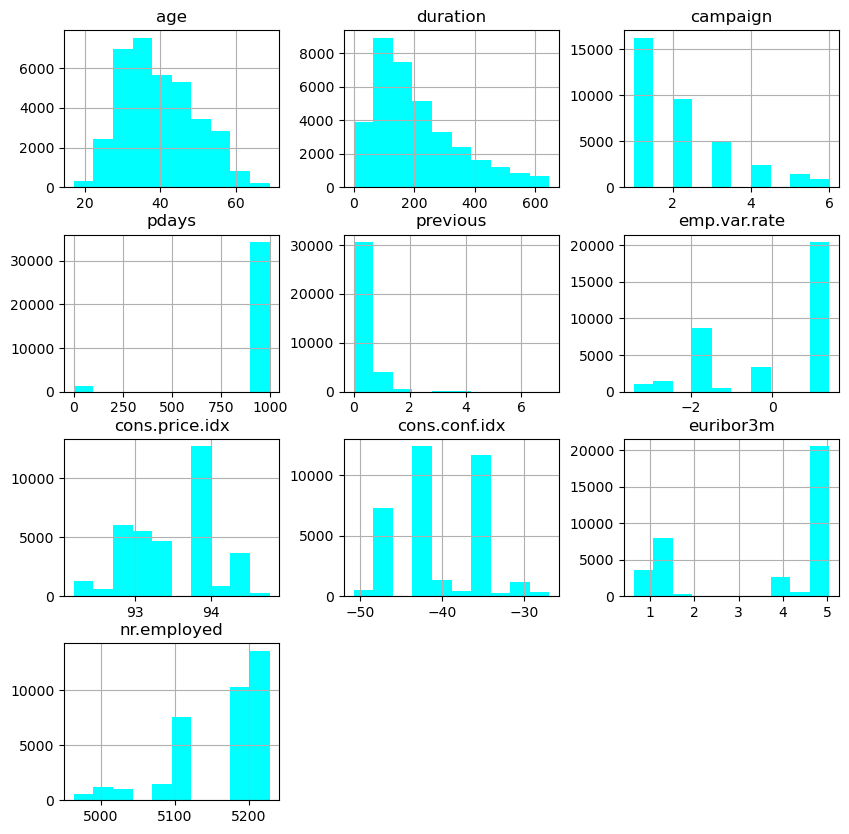

In [128]:
data.hist(figsize=(10,10),color="#00ffff")
plt.show()

In [129]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [130]:
lb=LabelEncoder()
data_encoded=data.apply(lb.fit_transform)
data_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,286,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,286,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,286,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,286,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,286,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,20,0,1,6,0,2,0,0,7,0,...,0,26,0,1,5,25,0,170,0,1
41182,12,10,2,0,0,2,0,0,7,0,...,0,9,1,2,5,25,0,170,0,0
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,170,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,170,0,0


In [131]:
data_encoded['y'].value_counts(normalize=True)*100

y
0    91.88718
1     8.11282
Name: proportion, dtype: float64

In [132]:
## independent variables
x = data_encoded.iloc[:,:-1] 


In [133]:
## Target variable
y = data_encoded.iloc[:,-1]  

In [134]:
y.shape

(35561,)

# Spliting the dataset into train and test 

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24892, 20)
(10669, 20)
(24892,)
(10669,)


# Decisiontreeclassifier using gini criterion

In [136]:
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# Evaluating training and testing accuracy

In [137]:
print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.9396191547485135
Testing accuracy: 0.9411378760896054


In [138]:
y_pred=dc.predict(x_test)

# Evaluating prediction accuracy

In [139]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9411378760896054


In [140]:
print(confusion_matrix(y_test,y_pred))

[[9656  156]
 [ 472  385]]


In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9812
           1       0.71      0.45      0.55       857

    accuracy                           0.94     10669
   macro avg       0.83      0.72      0.76     10669
weighted avg       0.93      0.94      0.93     10669



In [142]:
from sklearn.tree import plot_tree

# Plot decision tree

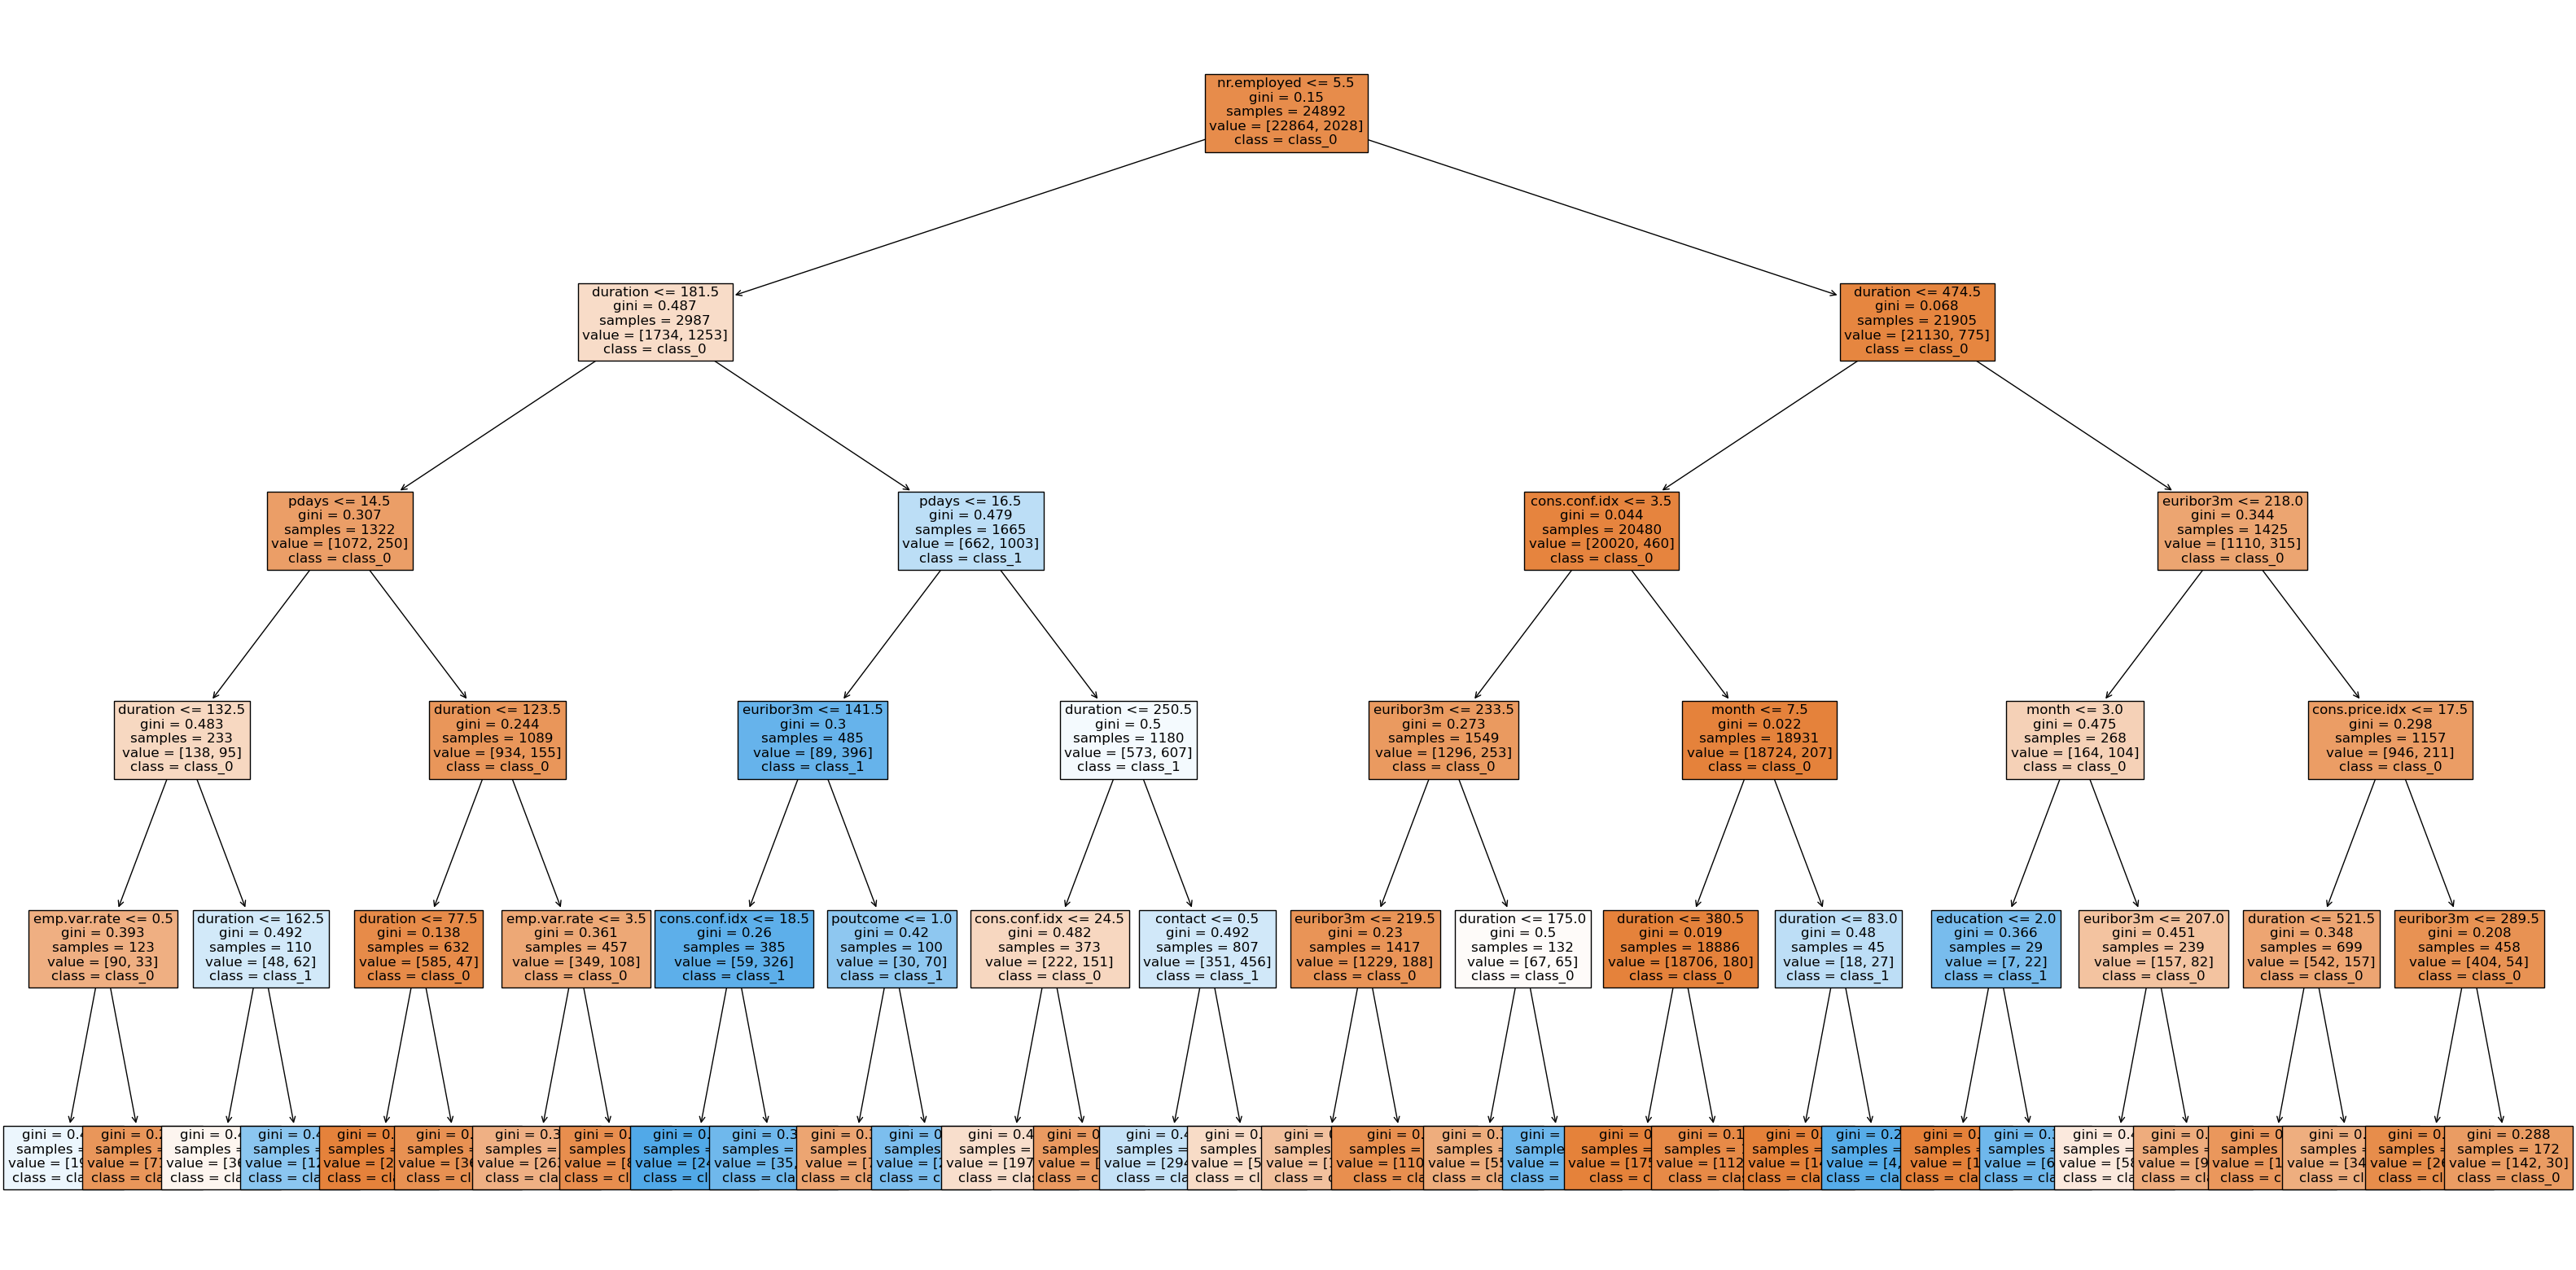

In [143]:
feature_names=data.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

# Using entropy criterion

In [144]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

# Evaluating training and testing accuracy

In [145]:
print("Training accuracy:",dc1.score(x_train,y_train))
print("Testing accuracy:",dc1.score(x_test,y_test))

Training accuracy: 0.9392977663506348
Testing accuracy: 0.9405754991095698
